In [474]:
# %load_ext autoreload
# %reload_ext autoreload
# %autoreload 2

In [475]:
import os
os.chdir('C:\\Users\\WDG1DCR\\Desktop\\my_projects\\data_analysis\\data_cleanse')
# os.chdir('C:\\Users\\gratten\\Documents\\python\\projects\\data_cleanse')

import pandas as pd
from prep import filter
from prep import sort
from plot import bar
from utility import generate

In [476]:
fileName = 'filelist_7_15'
df_og = pd.read_csv('datasets/' + fileName + '.csv', sep=';')

In [477]:
df = filter.sld(df_og)

In [478]:
dups = df[df.duplicated(['name_low'], keep=False)]
dups = dups.sort_values(['name_low'])

In [479]:
dups = dups.reset_index()

In [480]:
dups.head()

,index,Name,Format,size,modified,created,path,name_low
0,199469,#40 CHAIN.SLDASM,SLDASM,"98,273",10/12/2018 13:43:23,02/22/2016 01:04:05,R:\Doc\SolidWorks\SolidWorks Palette\Palette P...,#40 chain.sldasm
1,13308,#40 Chain.SLDASM,SLDASM,"92,370",06/19/2020 16:04:50,02/21/2016 22:51:10,R:\Doc\SolidWorks\CONVEYOR,#40 chain.sldasm
2,199473,#40 PIN RIVETED.SLDPRT,SLDPRT,"55,996",02/24/2017 15:31:59,02/22/2016 01:04:05,R:\Doc\SolidWorks\SolidWorks Palette\Palette P...,#40 pin riveted.sldprt
3,46813,#40 PIN RIVETED.SLDPRT,SLDPRT,"52,842",11/20/2014 10:11:00,02/21/2016 23:05:11,R:\Doc\SolidWorks\HS4989 - QUAKER MAID MEATS,#40 pin riveted.sldprt
4,33754,#40 PIN RIVETEDRev2.SLDPRT,SLDPRT,"52,722",11/19/2014 22:34:28,02/21/2016 22:59:28,R:\Doc\SolidWorks\HS4836-4 TWO FLAP CLOSER (ME...,#40 pin rivetedrev2.sldprt


In [481]:
top_offenders = dups['path'].value_counts().index.to_list()

In [482]:
# input: data (trimmed dups), num, cut off indicator (ie valCounts > 5)
# output: top_offenders list at level 2, in reguards to top_offender[num]
def get_top_offenders(dups, num, limit):
    
    # list of all files in directory top_offender[num]
    file_list = []
    for i in range(len(dups['path'])):
        if dups['path'][i] == top_offenders[num]:
            file_list.append(dups['name_low'].iloc[i])
    
    # dictionary of all files in directory top_offender[num] and all other associated paths
    # {filename: [path1, path2, etc], filename: [path1, path2, etc]}
    file_paths = {}
    for file in file_list:
        dups_trimmed = dups[(dups['name_low'] == file)]
        path_list = []
        for path in dups_trimmed['path']:
            path_list.append(path)
        file_paths[file] = path_list
        
    # create a list of all paths involved, merged together
    partner_paths = []
    for k, v in file_paths.items():
        for i in v:
            if i != top_offenders[num]:
                partner_paths.append(i)
    
    # create series and use value_counts
    partner_paths_series = pd.Series(partner_paths)
    val_count = partner_paths_series.value_counts()
    
    # trim top_offenders2 list, per user input (> x associated paths)
    top_offenders2 = []
    for i in range(len(val_count)):
        if val_count[i] > limit:
            top_offenders2.append(val_count.index[i])
    
    return top_offenders2, file_paths

In [483]:
def build_data(offender, file_paths):
    
    # trim file_paths to only relevent files
    file_paths_trimmed = {}
    for k, v in file_paths.items():
        if offender in v:
            file_paths_trimmed[k] = v
            
    totalFiles = len(file_paths_trimmed.keys())
            
    occur_list = []
    for k, v in file_paths_trimmed.items():
        if len(v) not in occur_list:
                occur_list.append(len(v))

    occur_dict = {}
    for i in occur_list:
        occur_dict[i] = 0
        for v in file_paths_trimmed.values():
            if i == len(v):
                occur_dict[i] += 1
                
    num_list = []
    occur_list = []
    for i in range(len(occur_dict)):
        key = min(occur_dict.keys())
        num_list.append(key)
        value = occur_dict.pop(key)
        occur_list.append(value) 
            
    return num_list, occur_list, totalFiles

In [484]:
def chart_em(num_list, occur_list, totalFiles, titleA, titleB):
    
    df = pd.DataFrame({'other paths':num_list, 'occurences':occur_list})
    title = f'{titleA}\n{titleB}\nTotal Files: {totalFiles}'
    ax = df.plot.bar(x='other paths', y='occurences', rot=0, figsize=(10, 5), title = title)

In [485]:
num = 2
limit = 10

titleA = top_offenders[num]

top_offenders2, file_paths = get_top_offenders(dups, num, limit)

In [486]:
numlist_list = []
occurlist_list =[]
totalFiles_list = []
for i in top_offenders2:
    numlist, occurlist, totalFiles = build_data(i, file_paths)
    numlist_list.append(numlist)
    occurlist_list.append(occurlist)
    totalFiles_list.append(totalFiles)

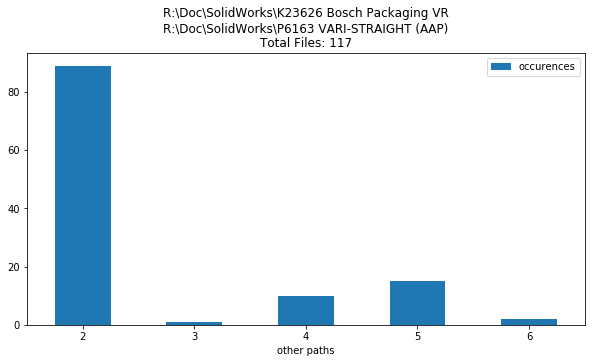

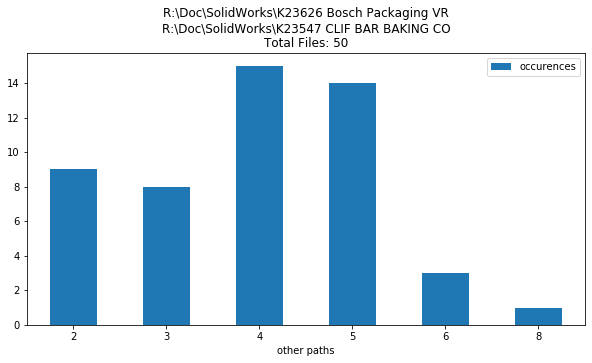

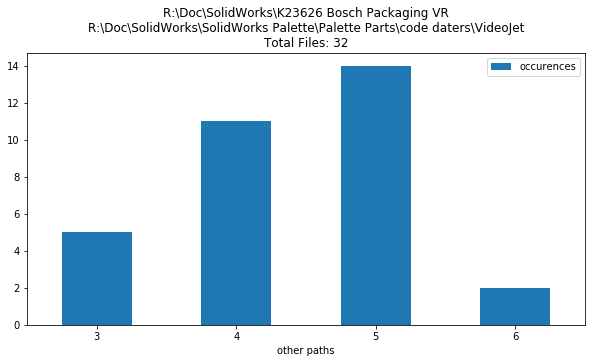

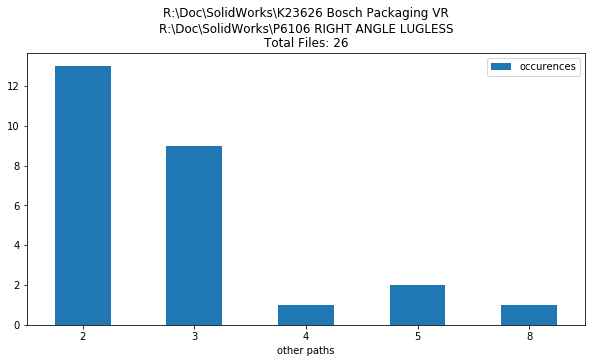

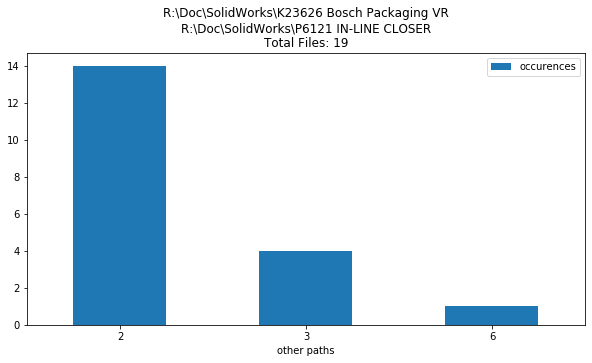

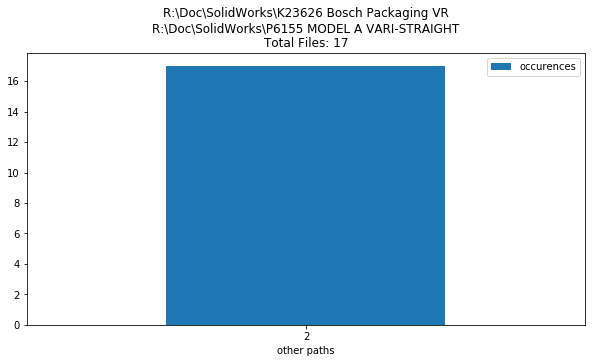

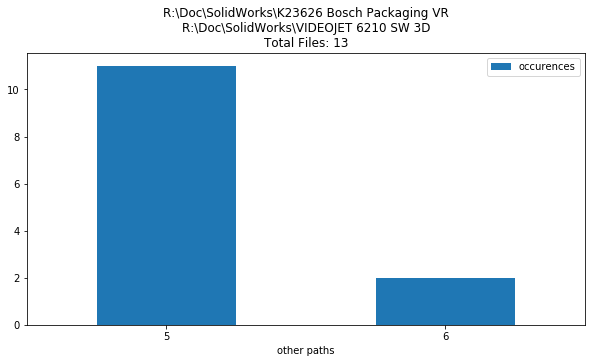

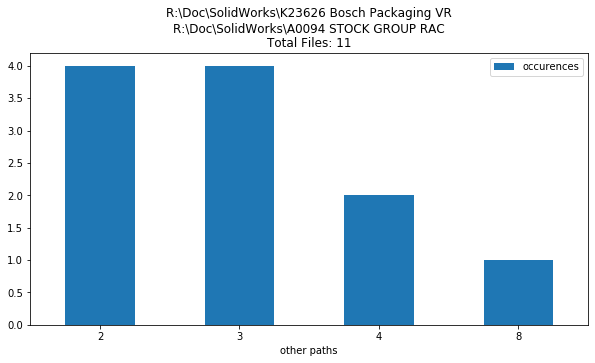

In [487]:
for i in range(len(numlist_list)):
    titleB = top_offenders2[i]
    chart_em(numlist_list[i], occurlist_list[i], totalFiles_list[i], titleA, titleB)